# Project: To predict the annual restaurant sales of 100k regional locations

The main agenda of this project is to predict the annual restaurant sales of 100k regional locations that would allow the TFI company to improve the effectiveness of its investments in new restaurant sites 



Datasets: Since this is a problem posted on Kaggle, the dataset is already available. 

Link for the dataset: https://www.kaggle.com/c/restaurant-revenue-prediction

# Submitted By - Muthyala Naga Raju

# Importing all the libraries

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing the all datasets

In [5]:
data=pd.read_csv(r"sampleSubmission.csv",encoding='latin1')

In [6]:
test=pd.read_csv(r"test.csv.zip",encoding='latin1')

In [7]:
train=pd.read_csv(r"train.csv.zip",encoding='latin1')

In [8]:
train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,Ä°stanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,DiyarbakÄ±r,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,Ä°zmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,Ä°stanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [7]:
data.head(5)

,Id,Prediction
0,0,4453532.6
1,1,4453532.6
2,2,4453532.6
3,3,4453532.6
4,4,4453532.6


In [8]:
test

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,NiÄde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,07/18/2011,NiÄde,Other,IL,1,2.0,4.0,3.0,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,Ä°stanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10/12/2013,Ä°stanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,7.5,5.0,0,0,0,4,0,0,0,0


In [9]:
train.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,Ä°stanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,DiyarbakÄ±r,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [83]:
data.tail()

,Id,Prediction
99995,99995,4453532.6
99996,99996,4453532.6
99997,99997,4453532.6
99998,99998,4453532.6
99999,99999,4453532.6


In [84]:
test.tail()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,07/18/2011,NiÄde,Other,IL,1,2.0,4.0,3.0,1,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,Ä°stanbul,Big Cities,IL,4,5.0,4.0,4.0,1,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10/12/2013,Ä°stanbul,Big Cities,FC,12,7.5,6.0,6.0,4,...,7.5,5.0,0,0,0,4,0,0,0,0
99999,99999,10/05/2010,Ä°stanbul,Big Cities,IL,2,5.0,4.0,4.0,2,...,5.0,3.0,0,2,0,2,2,4,2,0


In [85]:
train.tail()

,Id,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
132,132,06/25/2008,Trabzon,Other,2,3.0,3.0,5.0,4,2,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,Ä°zmir,Big Cities,4,5.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,3,4.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,Ä°stanbul,Big Cities,4,5.0,4.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0
136,136,09/01/2009,Ä°stanbul,Big Cities,4,5.0,3.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,6363241.0


In [87]:
data["Prediction"].dtypes

dtype('float64')

In [89]:
data["Prediction"].dtypes=="O"

False

In [90]:
data.memory_usage()

Index            128
Id            800000
Prediction    800000
dtype: int64

In [91]:
test.memory_usage()

Index            128
Id            800000
Open Date     800000
City          800000
City Group    800000
Type          800000
P1            800000
P2            800000
P3            800000
P4            800000
P5            800000
P6            800000
P7            800000
P8            800000
P9            800000
P10           800000
P11           800000
P12           800000
P13           800000
P14           800000
P15           800000
P16           800000
P17           800000
P18           800000
P19           800000
P20           800000
P21           800000
P22           800000
P23           800000
P24           800000
P25           800000
P26           800000
P27           800000
P28           800000
P29           800000
P30           800000
P31           800000
P32           800000
P33           800000
P34           800000
P35           800000
P36           800000
P37           800000
dtype: int64

In [92]:
train.memory_usage()

Index          128
Id            1096
Open Date     1096
City          1096
City Group    1096
P1            1096
P2            1096
P3            1096
P4            1096
P5            1096
P6            1096
P7            1096
P8            1096
P9            1096
P10           1096
P11           1096
P12           1096
P13           1096
P14           1096
P15           1096
P16           1096
P17           1096
P18           1096
P19           1096
P20           1096
P21           1096
P22           1096
P23           1096
P24           1096
P25           1096
P26           1096
P27           1096
P28           1096
P29           1096
P30           1096
P31           1096
P32           1096
P33           1096
P34           1096
P35           1096
P36           1096
P37           1096
revenue       1096
dtype: int64

In [10]:
test.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,NiÄde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [11]:
data.shape

(100000, 2)

In [34]:
data.columns

Index(['Id', 'Prediction'], dtype='object')

In [35]:
test.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'],
      dtype='object')

In [12]:
test.shape

(100000, 42)

In [36]:
train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

In [39]:
#Checking the null values
data.isnull().sum().sum()

0

In [41]:
#Checking the null values
test.isnull().sum().sum()

0

In [40]:
#Checking the null values
train.isnull().sum().sum()

0

In [96]:
#we are finding out of P34 whatever is having less than 18

In [95]:
train[train["P34"]<18]

,Id,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,Ä°stanbul,Big Cities,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,DiyarbakÄ±r,Other,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
4,4,05/09/2009,Gaziantep,Other,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
5,5,02/12/2010,Ankara,Big Cities,6,6.0,4.5,7.5,8,10,...,5.0,0,0,0,0,0,0,0,0,5017319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,2,3.0,3.0,5.0,4,2,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,Ä°zmir,Big Cities,4,5.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,3,4.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,Ä°stanbul,Big Cities,4,5.0,4.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


# Statistical Analysis

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,100000.0,4.999950e+04,28867.657797,0.0,24999.75,49999.5,74999.25,99999.0
Prediction,100000.0,4.453533e+06,0.000007,4453532.6,4453532.60,4453532.6,4453532.60,4453532.6


In [44]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,137.0,6.800000e+01,3.969257e+01,0.0,34.0,68.0,102.0,136.0
P1,137.0,4.014599e+00,2.910391e+00,1.0,2.0,3.0,4.0,12.0
P2,137.0,4.408759e+00,1.514900e+00,1.0,4.0,5.0,5.0,7.5
P3,137.0,4.317518e+00,1.032337e+00,0.0,4.0,4.0,5.0,7.5
P4,137.0,4.372263e+00,1.016462e+00,3.0,4.0,4.0,5.0,7.5
P5,137.0,2.007299e+00,1.209620e+00,1.0,1.0,2.0,2.0,8.0
P6,137.0,3.357664e+00,2.134235e+00,1.0,2.0,3.0,4.0,10.0
P7,137.0,5.423358e+00,2.296809e+00,1.0,5.0,5.0,5.0,10.0
P8,137.0,5.153285e+00,1.858567e+00,1.0,4.0,5.0,5.0,10.0
P9,137.0,5.445255e+00,1.834793e+00,4.0,4.0,5.0,5.0,10.0


In [97]:
train[train["P34"]<18].count()

Id            127
Open Date     127
City          127
City Group    127
P1            127
P2            127
P3            127
P4            127
P5            127
P6            127
P7            127
P8            127
P9            127
P10           127
P11           127
P12           127
P13           127
P14           127
P15           127
P16           127
P17           127
P18           127
P19           127
P20           127
P21           127
P22           127
P23           127
P24           127
P25           127
P26           127
P27           127
P28           127
P29           127
P30           127
P31           127
P32           127
P33           127
P34           127
P35           127
P36           127
P37           127
revenue       127
dtype: int64

In [45]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,100000.0,49999.500000,28867.657797,0.0,24999.75,49999.5,74999.25,99999.0
P1,100000.0,4.088030,2.812963,1.0,2.00,3.0,4.00,15.0
P2,100000.0,4.428085,1.428865,1.0,3.75,5.0,5.00,7.5
P3,100000.0,4.215325,0.842161,0.0,4.00,4.0,4.00,6.0
P4,100000.0,4.396025,1.035827,2.0,4.00,4.0,5.00,7.5
P5,100000.0,1.989590,1.065314,1.0,1.00,2.0,2.00,6.0
P6,100000.0,2.881900,1.531429,1.0,2.00,2.0,4.00,10.0
P7,100000.0,5.300510,2.178580,1.0,5.00,5.0,5.00,10.0
P8,100000.0,4.931000,1.718490,1.0,4.00,5.0,5.00,10.0
P9,100000.0,5.251380,1.702632,4.0,4.00,5.0,5.00,10.0


<AxesSubplot:xlabel='P32', ylabel='Density'>

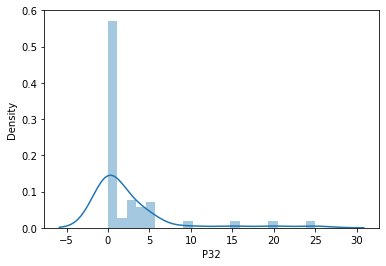

In [99]:
sns.distplot(train["P32"])

<AxesSubplot:xlabel='Id', ylabel='Density'>

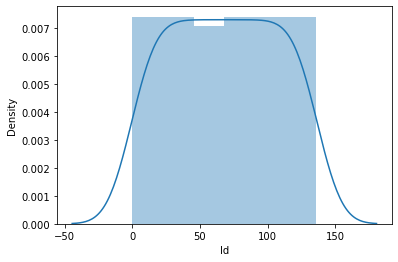

In [101]:
sns.distplot(train["Id"])

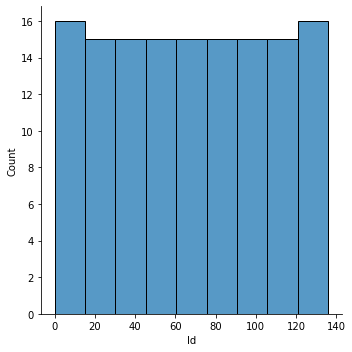

In [102]:
sns.displot(train["Id"])

<AxesSubplot:>

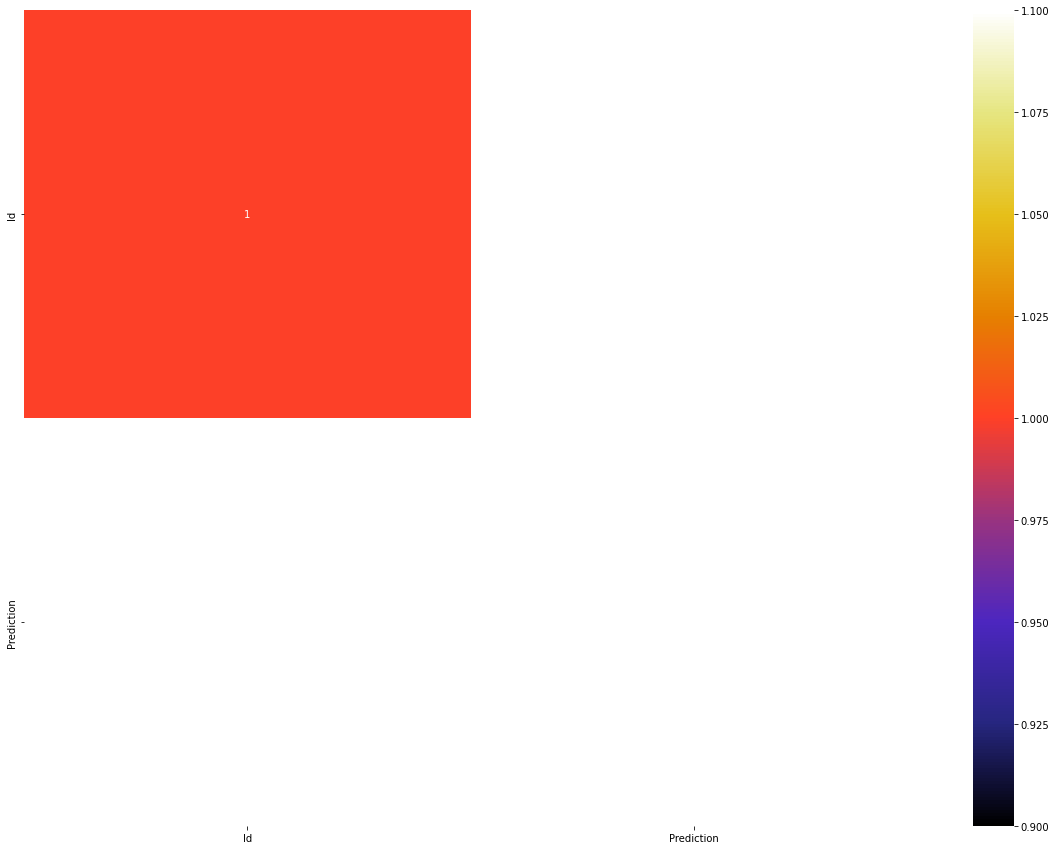

In [47]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap="CMRmap",annot=True)

In [105]:
train["P34"].quantile(1.0)

24.0

In [106]:
train["P2"].quantile(0.90)

6.0

In [107]:
train["P2"].unique()

array([5. , 4. , 4.5, 6. , 3. , 1. , 2. , 7.5])

In [108]:
train["P34"].unique()

array([ 5,  0, 18,  3,  4, 12,  2, 24], dtype=int64)

<AxesSubplot:>

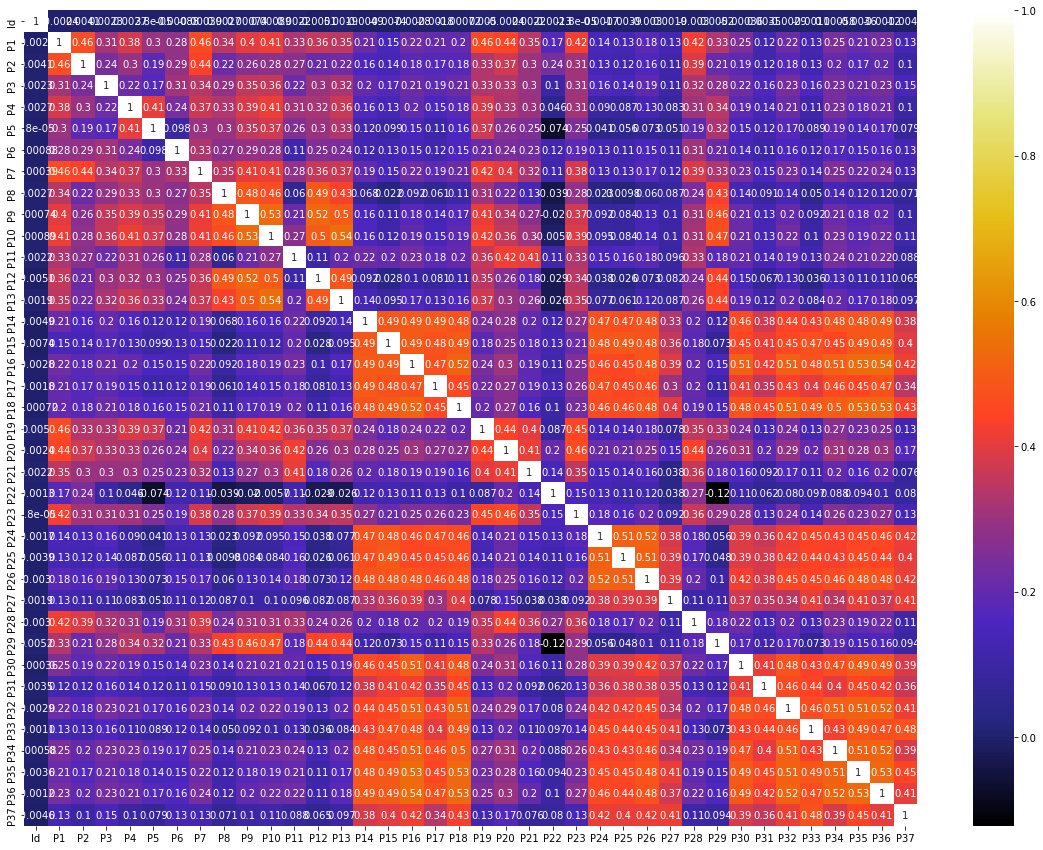

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(test.corr(),cmap="CMRmap",annot=True)

<AxesSubplot:>

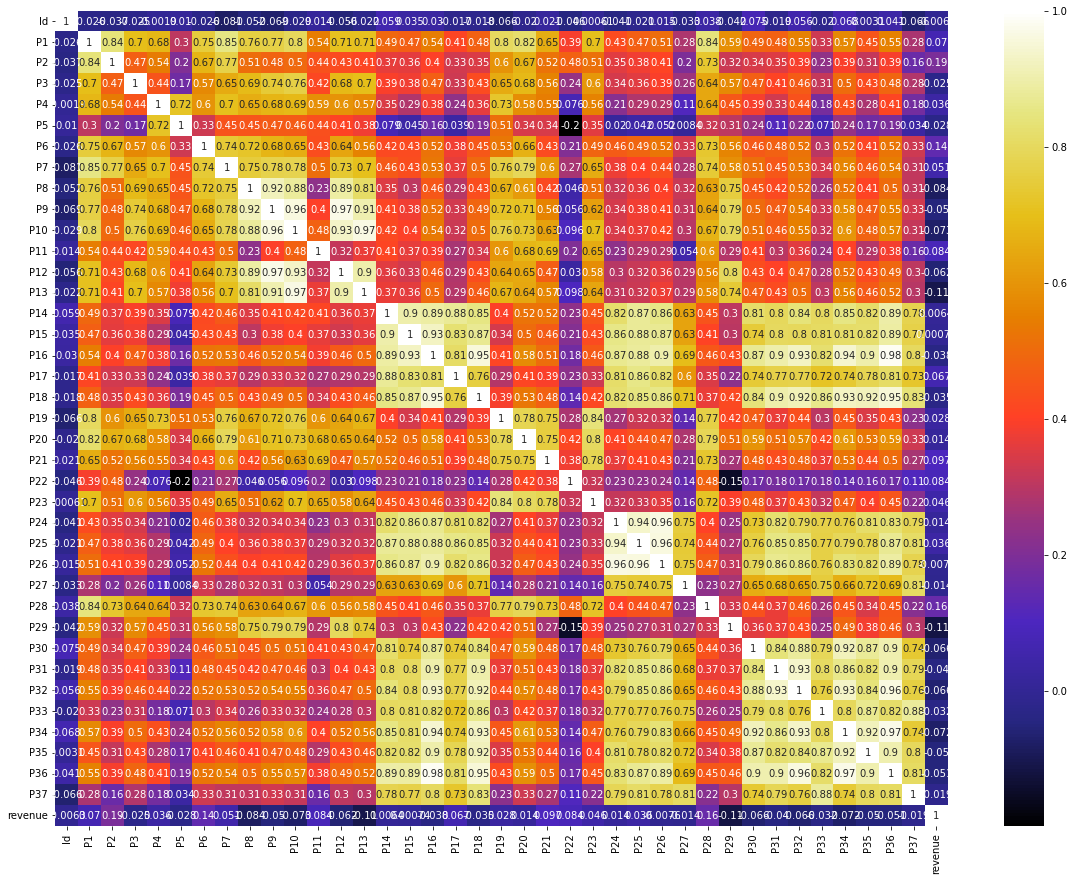

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),cmap="CMRmap",annot=True)

In [51]:
data.cov()

,Id,Prediction
Id,8.333417e+08,0.000000e+00
Prediction,0.000000e+00,8.673704e-19


In [52]:
test.cov()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,8.333417e+08,-198.214727,167.659144,55.026113,80.706630,1.159387,-38.805998,-24.414269,135.149011,36.291243,...,-182.568098,265.845043,-45.041680,234.970435,-335.363704,-48.615311,78.499840,-340.184917,-128.241317,-224.632866
P1,-1.982147e+02,7.912760,1.867909,0.740532,1.101414,0.896945,1.218759,2.798844,1.651121,1.916420,...,2.529865,1.671772,2.987357,0.794759,2.440954,0.563902,3.235046,1.903295,2.501624,0.620389
P2,1.676591e+02,1.867909,2.041656,0.287995,0.438270,0.285644,0.626428,1.361705,0.534733,0.643929,...,1.188255,0.530696,1.154872,0.398157,1.016870,0.276644,1.363814,0.805616,1.074573,0.249222
P3,5.502611e+01,0.740532,0.287995,0.709235,0.189065,0.155508,0.400344,0.627509,0.418457,0.505592,...,0.582596,0.415069,0.782826,0.312144,0.785789,0.201689,0.920820,0.583682,0.734221,0.207403
P4,8.070663e+01,1.101414,0.438270,0.189065,1.072937,0.447387,0.372939,0.831059,0.588602,0.680939,...,0.678285,0.626140,0.860550,0.329270,0.872885,0.177810,1.137110,0.617485,0.841084,0.173731
P5,1.159387e+00,0.896945,0.285644,0.155508,0.447387,1.134893,0.159102,0.688965,0.551797,0.641643,...,0.433198,0.615656,0.694144,0.303716,0.731920,0.144831,0.923460,0.496875,0.695473,0.141236
P6,-3.880600e+01,1.218759,0.626428,0.400344,0.372939,0.159102,2.345276,1.084981,0.716038,0.749985,...,1.017755,0.586026,0.930957,0.384906,0.985556,0.293018,1.211196,0.747415,0.953885,0.332914
P7,-2.441427e+01,2.798844,1.361705,0.627509,0.831059,0.688965,1.084981,4.746211,1.295888,1.522953,...,1.797383,1.274885,2.161079,0.770930,1.990217,0.459322,2.552079,1.529032,1.953588,0.474098
P8,1.351490e+02,1.651121,0.534733,0.418457,0.588602,0.551797,0.716038,1.295888,2.953209,1.417699,...,0.877705,1.322489,1.037298,0.360243,0.934412,0.132594,1.109099,0.646202,0.771721,0.204604
P9,3.629124e+01,1.916420,0.643929,0.505592,0.680939,0.641643,0.749985,1.522953,1.417699,2.898957,...,1.120942,1.406833,1.521165,0.503486,1.366643,0.240412,1.711990,0.986873,1.269593,0.288994


In [53]:
train.cov()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,1575.500000,-3.044118,-2.224265,-1.025735,-0.077206,0.485294,-2.198529,-7.382353,-3.845588,-5.000000,...,-2.801471,16.514706,-2.683824,11.617647,-1.345588,13.882353,0.419118,6.750000,-4.676471,-6.417788e+05
P1,-3.044118,8.470374,3.688842,2.090919,2.005555,1.066069,4.641799,5.707009,4.115393,4.089040,...,2.869338,7.856913,4.897918,8.411389,1.630313,8.581043,4.492218,6.732181,1.446812,5.264434e+05
P2,-2.224265,3.688842,2.294923,0.740581,0.832009,0.371994,2.176256,2.678617,1.422177,1.338718,...,0.821235,2.868559,1.880662,3.085069,0.604659,3.085391,1.638713,2.449603,0.437205,7.473985e+05
P3,-1.025735,2.090919,0.740581,1.065720,0.465489,0.210901,1.256924,1.544735,1.322295,1.405378,...,0.991735,2.704031,1.474560,2.501020,0.547553,2.674458,1.520073,2.086706,0.525145,-6.545648e+04
P4,-0.077206,2.005555,0.832009,0.465489,1.033196,0.879616,1.292347,1.635359,1.236636,1.259500,...,0.772891,2.182160,1.191015,2.343361,0.315640,2.279841,0.970669,1.744150,0.323851,9.343959e+04
P5,0.485294,1.066069,0.371994,0.210901,0.879616,1.463182,0.842958,1.239534,1.006226,1.033491,...,0.624007,1.634339,0.478371,1.363783,0.146039,1.518463,0.720374,0.976385,0.072671,-8.784400e+04
P6,-2.198529,4.641799,2.176256,1.256924,1.292347,0.842958,4.554959,3.619526,2.856537,2.648401,...,2.021200,5.442894,3.579863,5.795942,1.089738,5.728210,3.033598,4.666380,1.252040,7.647321e+05
P7,-7.382353,5.707009,2.678617,1.544735,1.635359,1.239534,3.619526,5.275333,3.206687,3.265994,...,2.254911,6.475472,3.649903,6.378811,1.323207,6.673787,3.612548,5.203843,1.273723,3.027304e+05
P8,-3.845588,4.115393,1.422177,1.322295,1.236636,1.006226,2.856537,3.206687,3.454272,3.137130,...,2.357825,4.681408,2.744311,5.021790,0.809468,5.034779,2.591080,3.871726,1.026084,-4.032067e+05
P9,-5.000000,4.089040,1.338718,1.405378,1.259500,1.033491,2.648401,3.265994,3.137130,3.366466,...,2.435756,5.106430,3.011486,5.227512,1.018678,5.515940,2.950140,4.221232,1.087323,-2.379896e+05


In [13]:
train.shape

(137, 43)

In [14]:
data.dtypes

Id              int64
Prediction    float64
dtype: object

In [15]:
test.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
dtype: object

In [16]:
train.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

In [17]:
data.drop(columns = "Id" , inplace = True)
data.head(5)

,Prediction
0,4453532.6
1,4453532.6
2,4453532.6
3,4453532.6
4,4453532.6


In [18]:
test.drop(columns = "Id" , inplace = True)
test.head(5)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,NiÄde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [19]:
train.drop(columns = "Id" , inplace = True)
train.head(5)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,Ä°stanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,DiyarbakÄ±r,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [20]:
data.describe()


,Prediction
count,1.000000e+05
mean,4.453533e+06
std,6.685998e-06
min,4.453533e+06
25%,4.453533e+06
50%,4.453533e+06
75%,4.453533e+06
max,4.453533e+06


In [21]:
train.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [22]:
test.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,5.458970,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,1.763601,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,5.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [23]:
data.isnull().sum()

Prediction    0
dtype: int64

In [24]:
train.isnull().sum()

Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [25]:
test.isnull().sum()

Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [26]:
data.columns

Index(['Prediction'], dtype='object')

In [27]:
test.columns

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37'],
      dtype='object')

In [28]:
train.columns

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

In [29]:
x_data = data
x = data.iloc[:,0:4].values
x

array([[4453532.6],
       [4453532.6],
       [4453532.6],
       ...,
       [4453532.6],
       [4453532.6],
       [4453532.6]])

In [30]:
y_train = train
y = train.iloc[:,0:4].values
y

array([['07/17/1999', 'Ä°stanbul', 'Big Cities', 'IL'],
       ['02/14/2008', 'Ankara', 'Big Cities', 'FC'],
       ['03/09/2013', 'DiyarbakÄ±r', 'Other', 'IL'],
       ['02/02/2012', 'Tokat', 'Other', 'IL'],
       ['05/09/2009', 'Gaziantep', 'Other', 'IL'],
       ['02/12/2010', 'Ankara', 'Big Cities', 'FC'],
       ['10/11/2010', 'Ä°stanbul', 'Big Cities', 'IL'],
       ['06/21/2011', 'Ä°stanbul', 'Big Cities', 'IL'],
       ['08/28/2010', 'Afyonkarahisar', 'Other', 'IL'],
       ['11/16/2011', 'Edirne', 'Other', 'IL'],
       ['08/09/2013', 'Kocaeli', 'Other', 'FC'],
       ['05/22/2012', 'Ä°stanbul', 'Big Cities', 'IL'],
       ['02/28/2013', 'Ankara', 'Big Cities', 'IL'],
       ['10/16/2010', 'Ä°stanbul', 'Big Cities', 'FC'],
       ['12/29/2011', 'Bursa', 'Other', 'FC'],
       ['02/07/2012', 'Ä°stanbul', 'Big Cities', 'IL'],
       ['01/07/2000', 'Ä°stanbul', 'Big Cities', 'FC'],
       ['11/08/2009', 'Ä°stanbul', 'Big Cities', 'FC'],
       ['04/21/2012', 'Ä°zmir', 'Big Citie

In [31]:
k_test = test
k = test.iloc[:,0:4].values
k

array([['01/22/2011', 'NiÄ\x9fde', 'Other', 'FC'],
       ['03/18/2011', 'Konya', 'Other', 'IL'],
       ['10/30/2013', 'Ankara', 'Big Cities', 'FC'],
       ...,
       ['12/29/2012', 'Ä°stanbul', 'Big Cities', 'IL'],
       ['10/12/2013', 'Ä°stanbul', 'Big Cities', 'FC'],
       ['10/05/2010', 'Ä°stanbul', 'Big Cities', 'IL']], dtype=object)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Prediction  100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          137 non-null    int64  
 10  P7          137 non-null    int64  
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Open Date   100000 non-null  object 
 1   City        100000 non-null  object 
 2   City Group  100000 non-null  object 
 3   Type        100000 non-null  object 
 4   P1          100000 non-null  int64  
 5   P2          100000 non-null  float64
 6   P3          100000 non-null  float64
 7   P4          100000 non-null  float64
 8   P5          100000 non-null  int64  
 9   P6          100000 non-null  int64  
 10  P7          100000 non-null  int64  
 11  P8          100000 non-null  int64  
 12  P9          100000 non-null  int64  
 13  P10         100000 non-null  int64  
 14  P11         100000 non-null  int64  
 15  P12         100000 non-null  int64  
 16  P13         100000 non-null  float64
 17  P14         100000 non-null  int64  
 18  P15         100000 non-null  int64  
 19  P16

<AxesSubplot:>

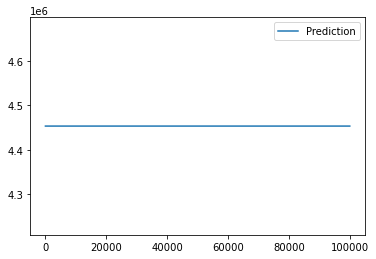

In [35]:
x_data.plot(kind = "line")

<AxesSubplot:>

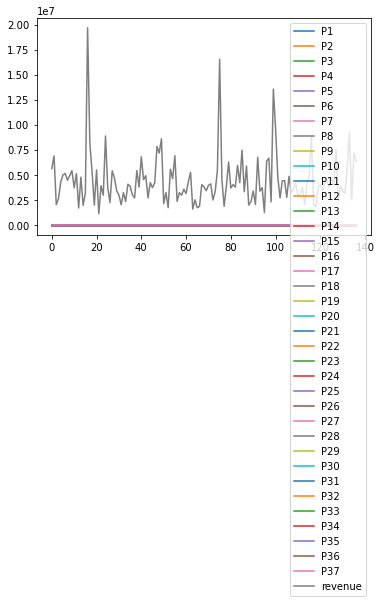

In [36]:
y_train.plot(kind = "line")

<AxesSubplot:>

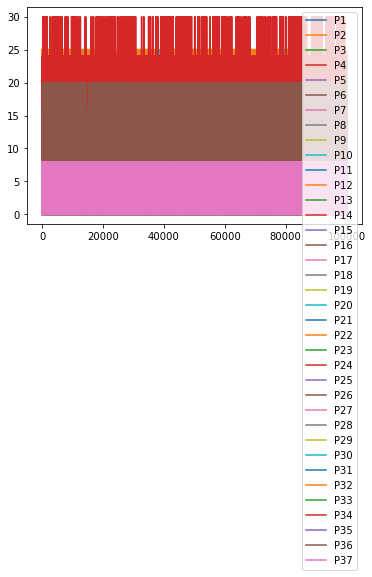

In [37]:
k_test.plot(kind = "line")

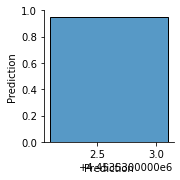

In [38]:
sns.pairplot(data = x_data)

In [1]:
sns.pairplot(train = y_train)

NameError: name 'sns' is not defined

# Correlation between the variables

In [9]:
data.corr()

,Id,Prediction
Id,1.0,NaN
Prediction,NaN,NaN


In [10]:
train.corr()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,1.000000,-0.026351,-0.036991,-0.025033,-0.001914,0.010108,-0.025953,-0.080977,-0.052129,-0.068655,...,-0.041989,0.075148,-0.019252,0.055963,-0.019958,0.067714,0.003073,0.040799,-0.065791,-0.006277
P1,-0.026351,1.000000,0.836671,0.695928,0.677941,0.302820,0.747296,0.853753,0.760820,0.765743,...,0.586532,0.487589,0.479175,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601,0.070217
P2,-0.036991,0.836671,1.000000,0.473551,0.540322,0.203003,0.673106,0.769842,0.505116,0.481635,...,0.322511,0.342005,0.353477,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162,0.191518
P3,-0.025033,0.695928,0.473551,1.000000,0.443606,0.168891,0.570486,0.651489,0.689173,0.741967,...,0.571525,0.473089,0.406701,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065,-0.024613
P4,-0.001914,0.677941,0.540322,0.443606,1.000000,0.715406,0.595724,0.700482,0.654594,0.675336,...,0.452364,0.387747,0.333626,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916,0.035685
P5,0.010108,0.302820,0.203003,0.168891,0.715406,1.000000,0.326524,0.446154,0.447577,0.465662,...,0.306904,0.244032,0.112603,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548,-0.028191
P6,-0.025953,0.747296,0.673106,0.570486,0.595724,0.326524,1.000000,0.738388,0.720144,0.676323,...,0.563415,0.460618,0.477593,0.519243,0.300611,0.519635,0.413645,0.524552,0.327594,0.139094
P7,-0.080977,0.853753,0.769842,0.651489,0.700482,0.446154,0.738388,1.000000,0.751196,0.775003,...,0.584071,0.509213,0.452471,0.531011,0.339178,0.562561,0.457721,0.543563,0.309678,0.051165
P8,-0.052129,0.760820,0.505116,0.689173,0.654594,0.447577,0.720144,0.751196,1.000000,0.919956,...,0.754736,0.454937,0.420425,0.516617,0.256416,0.524474,0.405709,0.499777,0.308294,-0.084215
P9,-0.068655,0.765743,0.481635,0.741967,0.675336,0.465662,0.676323,0.775003,0.919956,1.000000,...,0.789784,0.502670,0.467334,0.544749,0.326869,0.582042,0.467916,0.551953,0.330927,-0.050352


In [11]:
test.corr()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,1.000000,-0.002441,0.004065,0.002263,0.002699,0.000038,-0.000878,-0.000388,0.002724,0.000738,...,-0.002960,0.005162,-0.000362,0.003527,-0.002925,-0.001097,0.000580,-0.003650,-0.001167,-0.004639
P1,-0.002441,1.000000,0.464730,0.312597,0.378007,0.299312,0.282915,0.456711,0.341561,0.400134,...,0.420912,0.333147,0.246433,0.122418,0.218506,0.130613,0.245453,0.209558,0.233677,0.131492
P2,0.004065,0.464730,1.000000,0.239331,0.296117,0.187654,0.286275,0.437440,0.217770,0.264683,...,0.389203,0.208198,0.187550,0.120736,0.179202,0.126147,0.203712,0.174622,0.197607,0.103990
P3,0.002263,0.312597,0.239331,1.000000,0.216735,0.173333,0.310414,0.342020,0.289140,0.352601,...,0.323765,0.276279,0.215698,0.160596,0.234952,0.156039,0.233363,0.214657,0.229081,0.146831
P4,0.002699,0.378007,0.296117,0.216735,1.000000,0.405433,0.235101,0.368274,0.330664,0.386100,...,0.306466,0.338850,0.192781,0.137733,0.212196,0.111844,0.234297,0.184630,0.213358,0.099997
P5,0.000038,0.299312,0.187654,0.173333,0.405433,1.000000,0.097522,0.296856,0.301408,0.353749,...,0.190312,0.323954,0.151198,0.123528,0.173003,0.088579,0.185009,0.144455,0.171538,0.079043
P6,-0.000878,0.282915,0.286275,0.310414,0.235101,0.097522,1.000000,0.325201,0.272077,0.287631,...,0.311031,0.214508,0.141061,0.108901,0.162051,0.124665,0.168799,0.151157,0.163665,0.129608
P7,-0.000388,0.456711,0.437440,0.342020,0.368274,0.296856,0.325201,1.000000,0.346136,0.410575,...,0.386122,0.328035,0.230183,0.153326,0.230035,0.137369,0.250019,0.217373,0.235622,0.129746
P8,0.002724,0.341561,0.217770,0.289140,0.330664,0.301408,0.272077,0.346136,1.000000,0.484525,...,0.239034,0.431388,0.140066,0.090829,0.136917,0.050272,0.137745,0.116462,0.117997,0.070985
P9,0.000738,0.400134,0.264683,0.352601,0.386100,0.353749,0.287631,0.410575,0.484525,1.000000,...,0.308120,0.463174,0.207315,0.128127,0.202116,0.091999,0.214601,0.179516,0.195930,0.101197


# Visualisation of Data

In [12]:
data["Id"].value_counts()

0        1
66650    1
66672    1
66671    1
66670    1
        ..
33331    1
33330    1
33329    1
33328    1
99999    1
Name: Id, Length: 100000, dtype: int64

In [13]:
test["Id"].value_counts()

0        1
66650    1
66672    1
66671    1
66670    1
        ..
33331    1
33330    1
33329    1
33328    1
99999    1
Name: Id, Length: 100000, dtype: int64

In [14]:
train["Id"].value_counts()

0      1
94     1
88     1
89     1
90     1
      ..
40     1
39     1
38     1
37     1
136    1
Name: Id, Length: 137, dtype: int64

In [15]:
data["Prediction"].value_counts()

4453532.6    100000
Name: Prediction, dtype: int64

# Univariate Analysis

If we analyze data over a single variable/column from a dataset, it is known as Univariate Analysis.

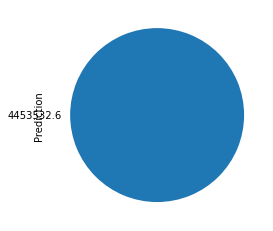

In [18]:
#calculate the percentage of each Prediction category.
data.Prediction.value_counts(normalize=True)

#plot the pie chart of Prediction categories
data.Prediction.value_counts(normalize=True).plot.pie()
plt.show()

In [ ]:
#calculate the percentage of each test category.
test.City.value_counts(normalize=True)

#plot the pie chart of test categories
test.City.value_counts(normalize=True).plot.pie()
plt.show()

In [19]:
#calculate the percentage of each prediction category.
data.Id.value_counts(normalize=True)

#plot the pie chart of Prediction categories
data.Id.value_counts(normalize=True).plot.pie()
plt.show()

KeyboardInterrupt: 

In [ ]:
#calculate the percentage of each test category.
data.City.value_counts(normalize=True)

#plot the pie chart of Prediction categories
data.City.value_counts(normalize=True).plot.pie()
plt.show()

This is how we analyze univariate categorical analysis. If the column or variable is numerical then we will analyze by calculating its mean, median, std, etc. We can get those values by using the describe function.

In [16]:
data.Prediction.describe()

count    1.000000e+05
mean     4.453533e+06
std      6.685998e-06
min      4.453533e+06
25%      4.453533e+06
50%      4.453533e+06
75%      4.453533e+06
max      4.453533e+06
Name: Prediction, dtype: float64

In [ ]:
test.City.describe()

# Multivariate Analysis

If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

In [ ]:
result = pd.pivot_table(data=data, index='Prediction', columns='Prediction',values='Prediction')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'Prediction', center=0.117)
plt.show()

# sns.pairplot(data=data[["Id","Prdiction"]])

# Phase 3: Modeling and Error Analysis

# Error Analysis Process

# Data Level Errors

model errors on the scale of all of the data.

# Prediction Distribution

Potential Fixes:
    
    
    
1.Removing outliers from data

2.Using a different cost function

In [ ]:
data = data()
x = data.data
y = data.target
columns = data.feature_names
#create the dataframe
data_df = pd.DataFrame(data.data)
data_df.columns = columns
data_df.head()

In [ ]:
import seaborn as sns
sns.boxplot(x=data['Prediction'])
#a box plot is a method for graphically depicting groups of numerical data through their quartiles
#Outliers may be plotted as individual points.


calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. 


 data point will be identified as outliers.

In [ ]:
from scipy import stats
import numpy as np
#Z-score function defined in scipy library to detect the outliers.
z = np.abs(stats.zscore(data))
print(z)


# Threshold to identify an outlier.

In [ ]:
threshold = 3
print(np.where(z > 3))

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.95)
IQR = Q3 - Q1
print(IQR)

As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [ ]:
print(data < (Q1 - 1.5 * IQR)) |(data> (Q3 + 1.5 * IQR))

In [ ]:
data= data[(z < 3).all(axis=1)]

In [ ]:
data.shape

In [ ]:
data.shape
#With and without outlier size of the dataset

# IQR Score -

 Z-score we can use previously calculated IQR score to filter out the outliers by keeping only valid values.

In [ ]:
boston_df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data> (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape
#The above code will remove the outliers from the dataset.

In [ ]:
# explicitly require this experimental feature
# now you can import normally from sklearn.impute
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load data

test=pd.read_csv(r"test.csv.zip",encoding='latin1')
test = test.loc[:, ['City', 'CityGroup', 'Type', 'revenue', 'P1']]

# Run imputer with a Random Forest estimator
imp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
test = pd.DataFrame(imp.fit_transform(test), columns=test.columns)


ValueError: could not convert string to float: '07/17/1999'

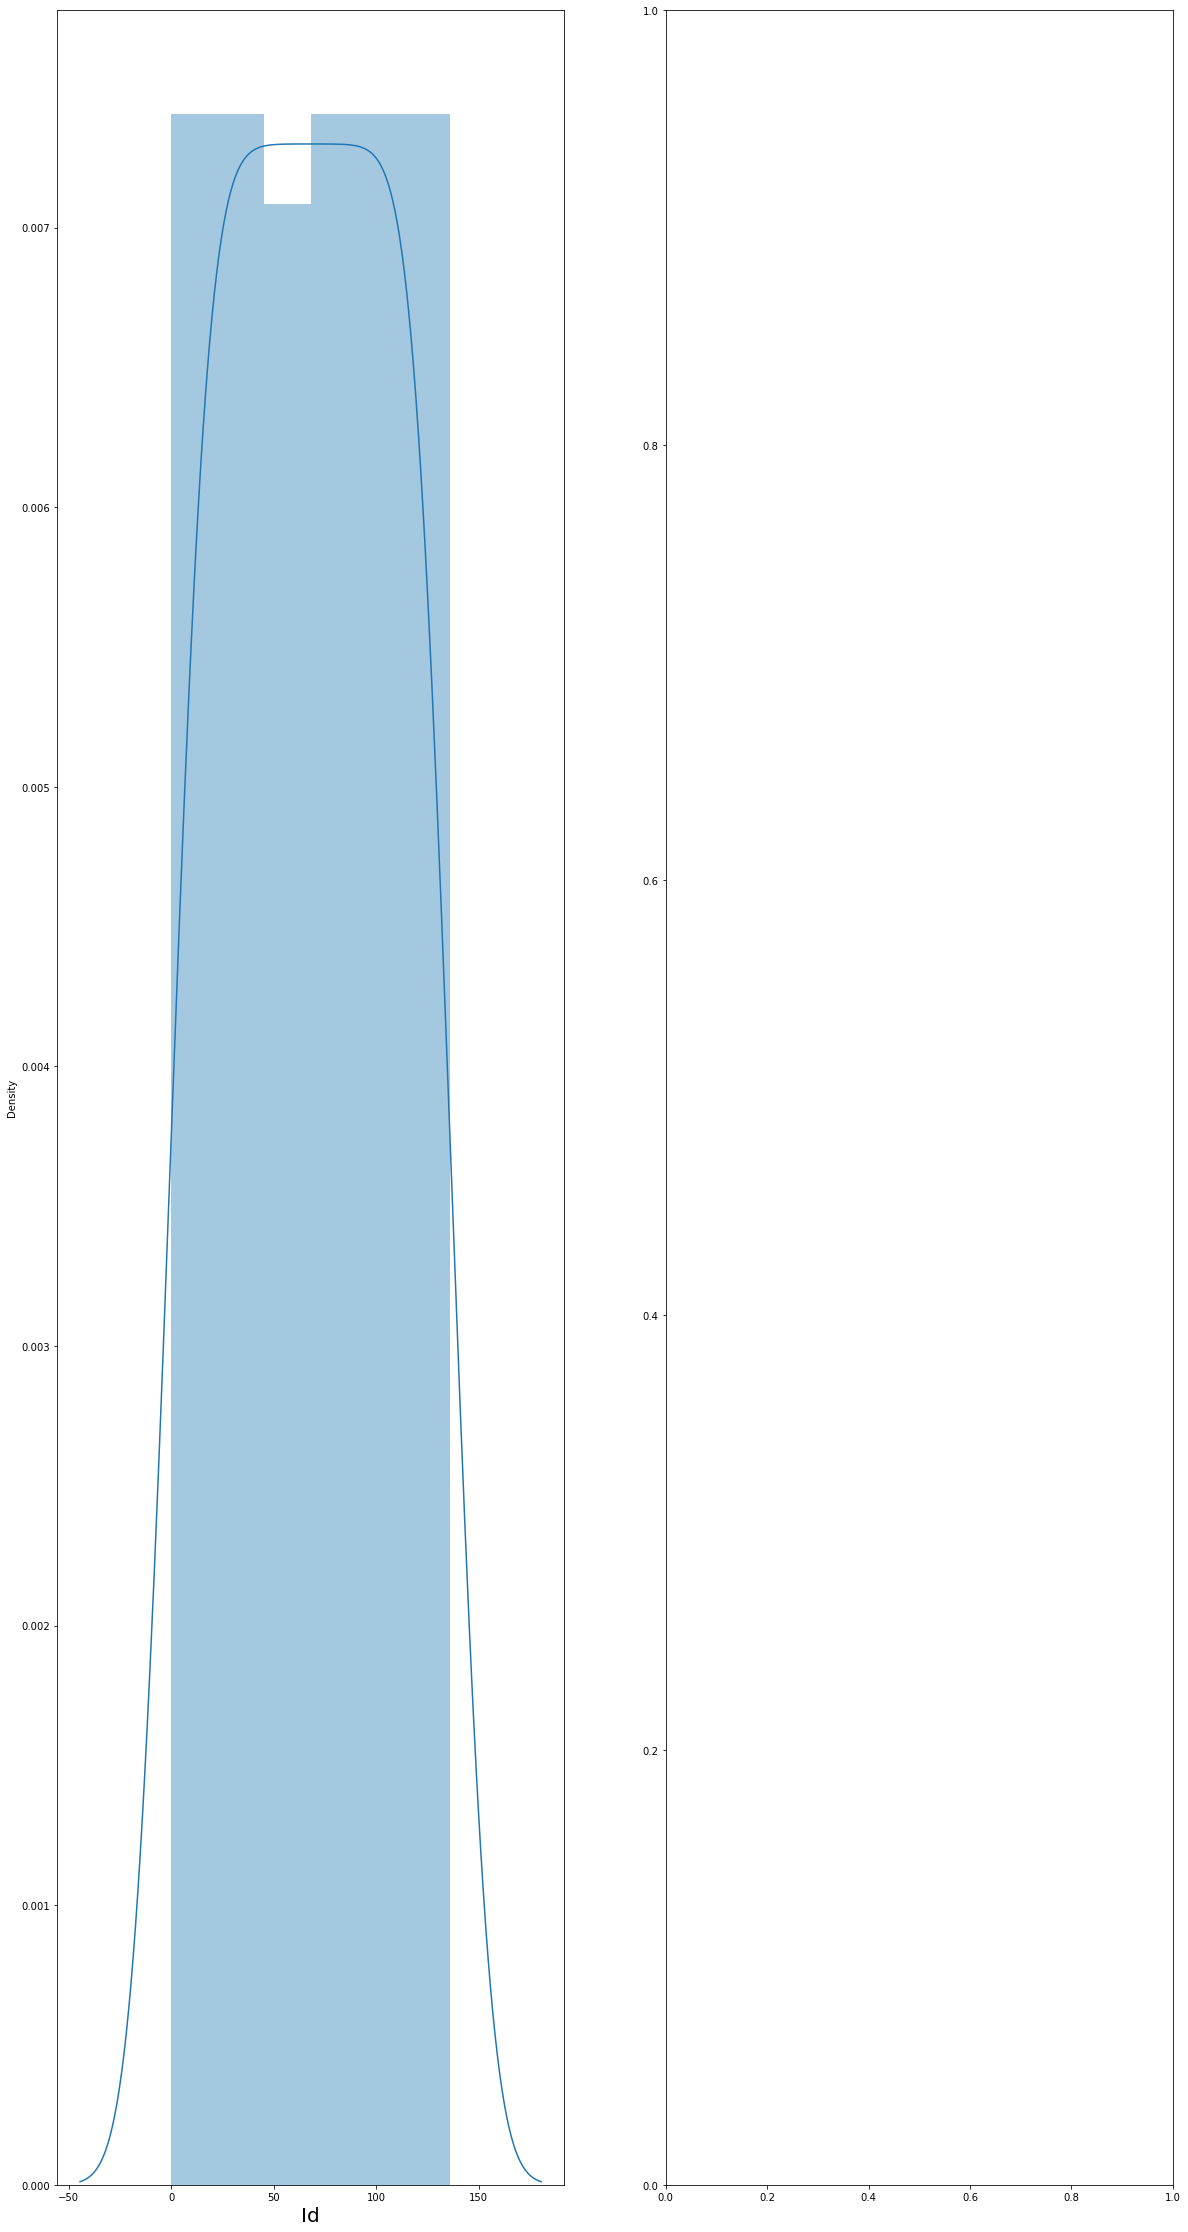

In [59]:
# Checking the distribution of the features

plt.figure(figsize=(20,40), facecolor='white')
pltnumber = 1

for column in train:

    if pltnumber<=14:

#Since there are 14 columns

        ax = plt.subplot (1,2, pltnumber) 
        sns.distplot(train[column])

        plt.xlabel(column, fontsize=20)

    pltnumber+=1

plt.show()

ValueError: could not convert string to float: '07/17/1999'

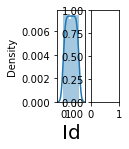

In [62]:
# Checking the distribution of the features

plt.figure(figsize=(20,40), facecolor='white')
pltnumber = 1

for column in train:

    if pltnumber<=14:

#Since there are 14 columns

        ax = plt.subplot (20,33, pltnumber) 
        sns.distplot(train[column])

        plt.xlabel(column, fontsize=20)

    pltnumber+=1


ValueError: could not convert string to float: '07/17/1999'

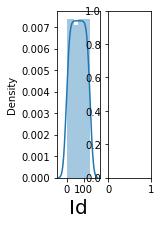

In [63]:
# Checking the distribution of the features

plt.figure(figsize=(20,40), facecolor='white')
pltnumber = 1

for column in train:

    if pltnumber<=14:

#Since there are 14 columns

        ax = plt.subplot (11,22, pltnumber) 
        sns.distplot(train[column])

        plt.xlabel(column, fontsize=20)

    pltnumber+=1


ValueError: could not convert string to float: '07/17/1999'

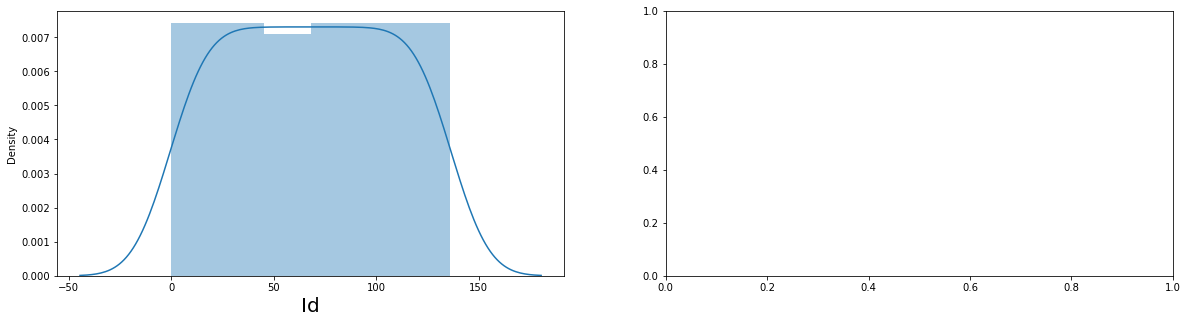

In [64]:
# Checking the distribution of the features

plt.figure(figsize=(20,40))
pltnumber = 1

for column in train:

    if pltnumber<=14:

#Since there are 14 columns

        ax = plt.subplot (7,2, pltnumber) 
        sns.distplot(train[column])

        plt.xlabel(column, fontsize=20)

    pltnumber+=1


In [74]:

train1 = tarin.copy()

def remove_outliers_IQR (col):

# Finding the IQR

    percentile25=train1[col].quantile (0.25)

    percentile75 = train1[col].quantile (0.75)

    print("percentile25", percentile25)

    print("percentile75", percentile75)

    iqr = percentile75 -percentile25

    upper_limit = percentile75 +1.* iqr
    lower_limit = percentile25 -1. *iqr

    print("Upper limit", upper_limit)


    print("Lower limit", lower_limit) 
    train1[col] = np.where(train1 [col]>upper_limit, upper_limit, np.where(train1[col] <lower_limit, lower_limit, df1[col]) 
    return train1[train1[col] > upper_limit]




SyntaxError: invalid syntax (Temp/ipykernel_7004/4280329401.py, line 25)

In [75]:
train.skew()

Id         0.000000
P1         1.841412
P2         0.040052
P3         0.145334
P4         1.035630
P5         2.414260
P6         1.562815
P7         0.669055
P8         1.474332
P9         1.726721
P10        1.724929
P11        1.324262
P12        1.403638
P13        1.164095
P14        2.879644
P15        2.011790
P16        2.223015
P17        3.451736
P18        1.973559
P19        2.503242
P20        1.642048
P21        2.729971
P22        0.806967
P23        3.276060
P24        1.774883
P25        2.200606
P26        2.149265
P27        2.456601
P28        1.920551
P29        1.541544
P30        2.879599
P31        2.288791
P32        2.916353
P33        1.241610
P34        2.719279
P35        1.985279
P36        2.433065
P37        1.576096
revenue    2.793479
dtype: float64

In [76]:
test.skew()

Id     0.000000
P1     2.022237
P2     0.144364
P3     0.182010
P4     1.218309
P5     1.649020
P6     1.801108
P7     0.753903
P8     1.594066
P9     1.886662
P10    1.864365
P11    1.455728
P12    1.677624
P13    1.260700
P14    3.105888
P15    1.797093
P16    2.393452
P17    3.569572
P18    2.254586
P19    2.503758
P20    1.823417
P21    3.085411
P22    0.565529
P23    3.128259
P24    1.920268
P25    1.854122
P26    2.329375
P27    2.768795
P28    1.934007
P29    1.425332
P30    3.223115
P31    2.858650
P32    3.231253
P33    1.381016
P34    3.440859
P35    2.164207
P36    2.798077
P37    1.914604
dtype: float64

In [78]:
x=train.drop(columns=["revenue"])
y=train["revenue"]

In [ ]:
plt.figure(figsize=(20,25), facecolor="white")
pltnumber = 1

for column in x:

    if pltnumber<=13:



        ax = plt.subplot (7,2, pltnumber) 
        sns.stripplot(y,x[column])

        

    pltnumber+=1
plt.tight_layout()


In [114]:
q1=train["P34"].quantile(.90)
q1

5.0

In [116]:
q3=train["P34"].quantile(.95)
q3

18.0

In [120]:
IQR=q3-q1
IQR

13.0

In [118]:
train["P34"].quantile(1.00)

24.0

In [123]:
upper_limit=q3+1.5*IQR
upper_limit

37.5

In [124]:
lower_limit=q1-(1.5*IQR)
lower_limit

-14.5

In [125]:
train[train["P34"]<lower_limit]

,Id,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue


In [126]:
train["P34"].quantile(1.00)

24.0

In [128]:
train["P34"].min()

0

In [130]:
train["P34"].unique()

array([ 5,  0, 18,  3,  4, 12,  2, 24], dtype=int64)

In [131]:
train["P34"].unique

<bound method Series.unique of 0       5
1       0
2       0
3      18
4       3
       ..
132     0
133     0
134     0
135     0
136     0
Name: P34, Length: 137, dtype: int64>

In [132]:
def get_iqr(train,column_name,q1_range,q3_range):
    q1=train[column_name].quantile(q1_range)
    q3=train[column_name].quantile(q3_range)
    IQR=q3-q1
    Upper_fence=q3+1.5*IQR
    lower_fence=q1-1.5*IQR
    return IQR,upper_fence,lower_fence

In [133]:
def outlier_threshold(train,variable):
    q1=train[variable].quantile(0.25)
    q2=train[variable].quantile(0.75)
    iqr=q2-q1
    up_limit=q2+(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit
    

In [134]:
def replace_with_threshold(train,numeric_col):
    for variable in numeric_col:
        low_limit,upper_limit=outlier_threshold(train_num,variable)
        train.loc[data[variable]<low_limit,variable]=low_limit
        train.loc[data[variable]>upper_limit,variable]=upper_limit
        

In [136]:
replace_with_threshold(P34,data_num.columns)

NameError: name 'P34' is not defined

In [137]:
train

,Id,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,Ä°stanbul,Big Cities,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,DiyarbakÄ±r,Other,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,2,3.0,3.0,5.0,4,2,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,Ä°zmir,Big Cities,4,5.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,3,4.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,Ä°stanbul,Big Cities,4,5.0,4.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


<AxesSubplot:xlabel='P5', ylabel='count'>

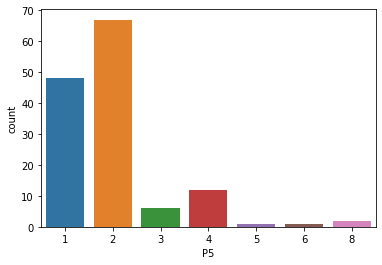

In [140]:
sns.countplot(train["P5"])

<AxesSubplot:xlabel='P7', ylabel='count'>

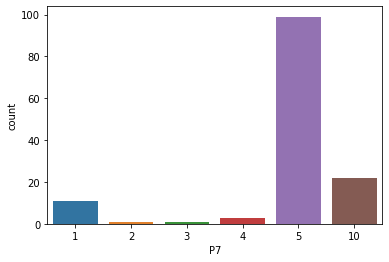

In [143]:
sns.countplot(train["P7"])

In [145]:
shiva=train.groupby("P5").mean()

In [146]:
shiva

,Id,P1,P2,P3,P4,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
P5,,,,,,,,,,,,,,,,,,,,,
1,63.541667,2.937500,4.000000,4.250000,3.687500,2.770833,4.375000,4.583333,4.750000,4.854167,...,2.520833,1.520833,1.458333,1.416667,0.979167,1.250000,1.541667,1.31250,1.020833,4.364242e+06
2,69.791045,4.358209,4.611940,4.253731,4.440299,3.447761,5.626866,5.089552,5.417910,5.388060,...,3.223881,2.805970,2.134328,2.791045,1.208955,2.686567,2.059701,2.41791,1.134328,4.741810e+06
3,78.333333,2.833333,4.166667,3.666667,4.666667,3.000000,4.833333,4.166667,4.166667,4.333333,...,2.333333,1.333333,0.833333,1.000000,0.666667,0.833333,1.000000,1.00000,0.666667,2.360158e+06
4,75.333333,6.500000,4.750000,5.333333,5.750000,4.416667,8.000000,7.250000,8.250000,8.416667,...,5.458333,7.083333,3.250000,5.416667,1.666667,6.500000,4.000000,5.00000,1.833333,4.220438e+06
5,124.000000,1.000000,3.000000,0.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.810007e+06
6,9.000000,6.000000,4.500000,6.000000,7.500000,4.000000,10.000000,10.000000,10.000000,10.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.444227e+06
8,41.500000,7.500000,6.750000,5.250000,7.500000,8.000000,10.000000,9.000000,8.000000,8.000000,...,3.750000,10.000000,4.500000,10.000000,2.000000,9.000000,6.000000,6.00000,1.000000,4.444332e+06


<AxesSubplot:>

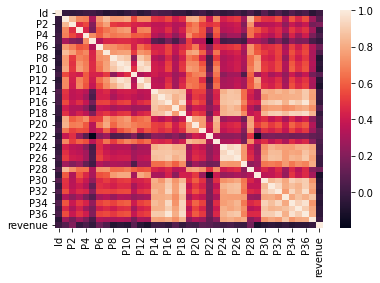

In [154]:
sns.heatmap(train.corr())

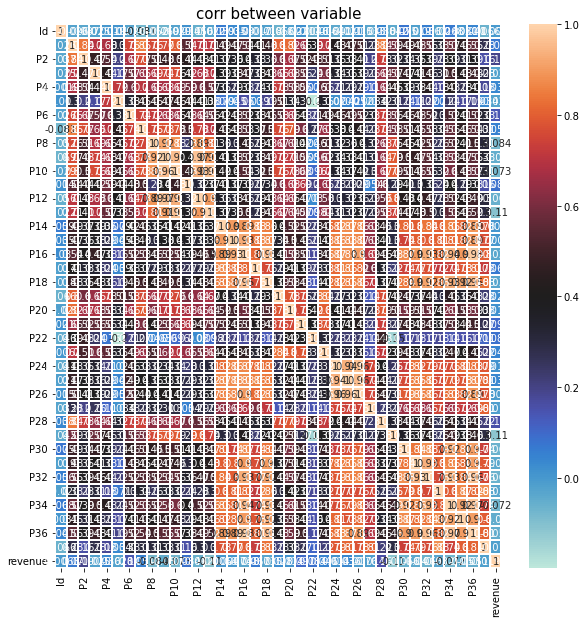

In [155]:
sns.heatmap(train.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()